<a href="https://colab.research.google.com/github/Krisha-priya/data-science_tutorial/blob/main/hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.figure(figsize=(12, 6))
linkage_matrix = sch.linkage(X_scaled, method='complete')

<Figure size 1200x600 with 0 Axes>

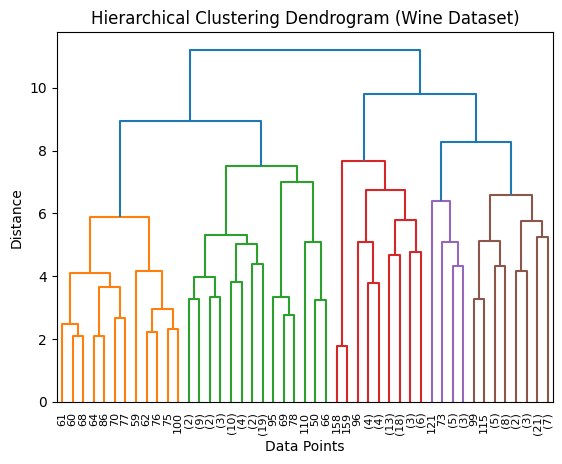

In [4]:
sch.dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Wine Dataset)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [5]:
num_clusters = 3
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

print("\nFirst 20 Cluster Assignments:", clusters[:20])
print("\nCross-tabulation of Clusters vs True Labels:")
print(pd.crosstab(clusters, y))


X_clustered = pd.DataFrame(X_scaled, columns=wine.feature_names)
X_clustered['True_Label'] = y
X_clustered['Cluster'] = clusters


First 20 Cluster Assignments: [1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 3 3 1 1]

Cross-tabulation of Clusters vs True Labels:
col_0   0   1   2
row_0            
1      51  18   0
2       0   3  48
3       8  50   0
